# Instacart Market Basket Analysis

## Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In [ ]:
orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [ ]:
products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [58]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [60]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [ ]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [ ]:
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

In [63]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [64]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [65]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


## Find and Remove Missing Values

We noticed that some columns contain missing values.


### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [ ]:
print(products[products['product_name'].isna()])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [ ]:
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 100)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 21)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [ ]:
aisle_name = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]
department_name = departments[departments['department_id'] == 21]['department'].values[0]
print(f"Aisle 100: {aisle_name}")
print(f"Department 21: {department_name}")

Aisle 100: missing
Department 21: missing


In [ ]:
products['product_name'] = products['product_name'].fillna('unknown')
print(products['product_name'].isna().sum())

0


In the products DataFrame, all of the missing values were found to be Nan values from aisle 100 and department 21. Both of those represent a missing value, perhaps meaning there is no aisle 100 department 21, which would give a missing product value for the data. We changed the NaN to 'unknown' value since we are not sure exactly as to what is missing from aisle 100 and department 21. This item could be out of stock or no longer carried.

### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [ ]:
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [ ]:
print(orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [ ]:
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())


1.0
64.0


In [ ]:
order_id_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [ ]:
missing_value_order = order_products[order_products['order_id'].isin(order_id_missing_values)]

product_counts = missing_value_order.groupby('order_id').size()

all_greater_than_64 = (product_counts > 64).all()

print(all_greater_than_64)


True


In [ ]:
missing_value_order = order_products[order_products['order_id'].isin(order_id_missing_values)].copy()

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)



For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. 

### `orders` data frame

In [ ]:
print(orders.duplicated().sum())


15


In [ ]:
print(orders[orders.duplicated()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [ ]:
orders = orders.drop_duplicates().reset_index(drop=True)

In [ ]:
print(orders.duplicated().sum())


0


There were duplicate rows for the orders DataFrame where the order_DOW and order_hour_of_day were the same for 15 values. This could be mean multiple were orders were placed and then not fulfilled or multiple orders placed on accident due to a system error.

### `products` data frame

In [ ]:
print(products.duplicated().sum())


0


In [ ]:
print(products.duplicated(subset = 'product_id').sum())


0


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [ ]:
print(products.duplicated(subset = 'product_name'.lower()).sum())


1257


Let's see what that looks like in our dataset :

In [85]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [ ]:
products = (products
            .assign(_lc=products['product_name'].str.lower())
            .drop_duplicates('_lc')
            .drop(columns='_lc'))

print(products.duplicated().sum())

0


### `departments` data frame

In [ ]:
departments[departments.duplicated()]

,department_id,department


### `aisles` data frame

In [ ]:
aisles[aisles.duplicated()]


,aisle_id,aisle


### `order_products` data frame

In [ ]:
orders[orders.duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [90]:
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [91]:
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

4       765
3       770
2       989
5      1371
1      1763
0      3180
6      4215
23     5611
22     8512
21    11019
7     13043
20    14624
19    19547
8     25024
18    25510
17    31930
9     35896
12    38034
16    38112
13    39007
14    39631
15    39789
11    40032
10    40578
Name: order_hour_of_day, dtype: int64


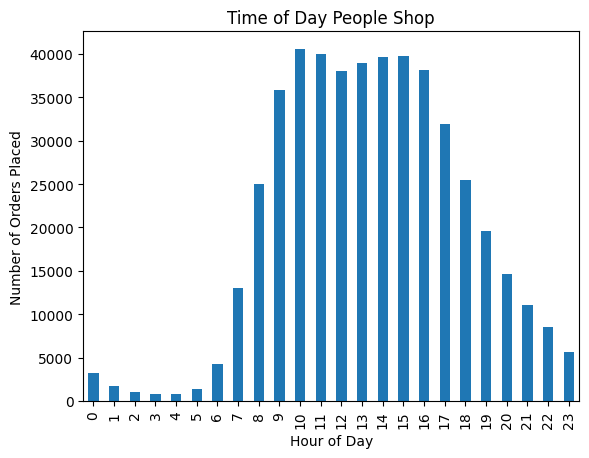

In [92]:
print(orders['order_hour_of_day'].value_counts(ascending=True))

orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Create the plot
orders_by_hour.plot(
    kind='bar',
    title='Time of Day People Shop',
    xlabel='Hour of Day',
    ylabel='Number of Orders Placed'
)

plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

4    59810
3    60897
6    62649
5    63488
2    65833
1    82185
0    84090
Name: order_dow, dtype: int64


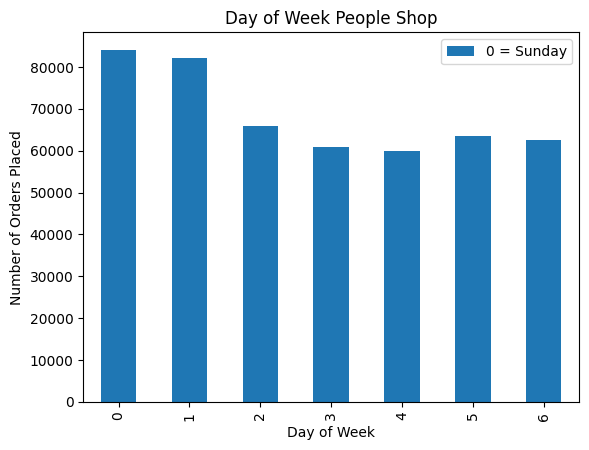

In [93]:
print(orders['order_dow'].value_counts(ascending=True))

orders_by_day = orders['order_dow'].value_counts().sort_index()

# Create the plot
orders_by_day.plot(
    kind='bar',
    title='Day of Week People Shop',
    xlabel='Day of Week',
    ylabel='Number of Orders Placed'
)
plt.legend(['0 = Sunday'])
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

26.0     2640
29.0     2673
25.0     2711
27.0     2986
24.0     3015
23.0     3337
28.0     3745
22.0     4514
19.0     4939
18.0     4971
20.0     5302
17.0     5498
21.0     6448
16.0     6587
15.0     9416
0.0      9589
12.0    10658
11.0    11467
13.0    11737
10.0    13309
14.0    13992
9.0     16753
1.0     20179
8.0     25361
2.0     27138
5.0     30096
3.0     30224
4.0     31006
6.0     33930
7.0     44577
30.0    51337
Name: days_since_prior_order, dtype: int64


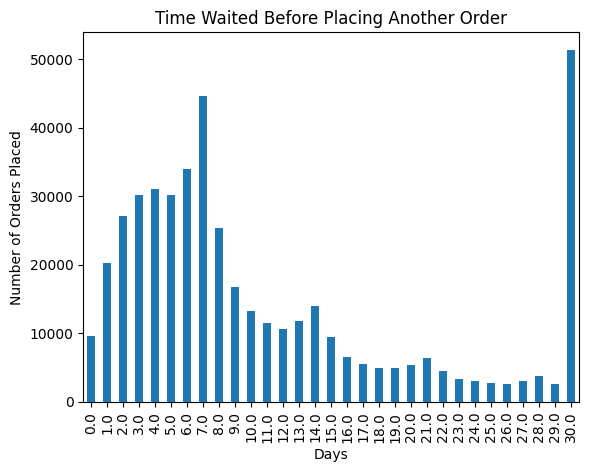

In [94]:
print(orders['days_since_prior_order'].value_counts(ascending=True))

time_between_orders = orders['days_since_prior_order'].value_counts().sort_index()

# Create the plot
time_between_orders.plot(
    kind='bar',
    title='Time Waited Before Placing Another Order',
    xlabel='Days',
    ylabel='Number of Orders Placed',
)

plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

To determine if there’s a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot histograms for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times.

In [95]:
wed_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].rename('wed_orders')
sat_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].rename('sat_orders')

In [96]:
wed_hours_counted = wed_orders.value_counts().sort_index()
sat_hours_counted = sat_orders.value_counts().sort_index()
print(wed_hours_counted)
print(sat_hours_counted)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: wed_orders, dtype: int64
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: sat_orders, dtype: int64


In [97]:
wed_sat_orders_concat = pd.concat([wed_hours_counted, sat_hours_counted], axis = 'columns')
wed_sat_orders_concat.columns = ['wednesday_orders_counted', 'saturday_orders_counted']
print(wed_sat_orders_concat)

    wednesday_orders_counted  saturday_orders_counted
0                        373                      464
1                        215                      254
2                        106                      177
3                        101                      125
4                        108                      118
5                        170                      161
6                        643                      451
7                       1732                     1619
8                       3125                     3246
9                       4490                     4311
10                      5026                     4919
11                      5004                     5116
12                      4688                     5132
13                      4674                     5323
14                      4774                     5375
15                      5163                     5188
16                      4976                     5029
17                      4175

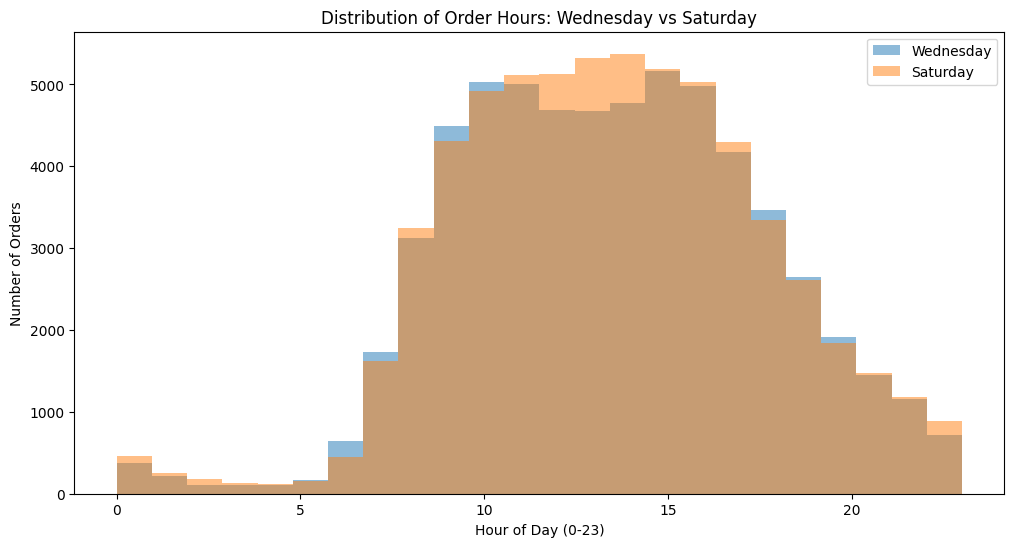

In [98]:
plt.figure(figsize=(12, 6))
plt.hist(wed_orders, alpha=0.5, label='Wednesday', bins=24)
plt.hist(sat_orders, alpha=0.5, label='Saturday', bins=24)
    
plt.title('Distribution of Order Hours: Wednesday vs Saturday')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [99]:
orders_per_customer = orders.groupby('user_id')['order_id'].count().value_counts().sort_values().rename('orders_per_customer')
print(orders_per_customer)

28        1
25        1
26        1
24        3
23       19
21       22
22       23
20       52
19       85
18      121
17      184
16      263
15      437
14      512
13      703
12      947
11     1308
10     1645
9      2152
8      3019
7      4240
6      6012
5      8777
4     13498
3     21547
2     36508
1     55357
Name: orders_per_customer, dtype: int64


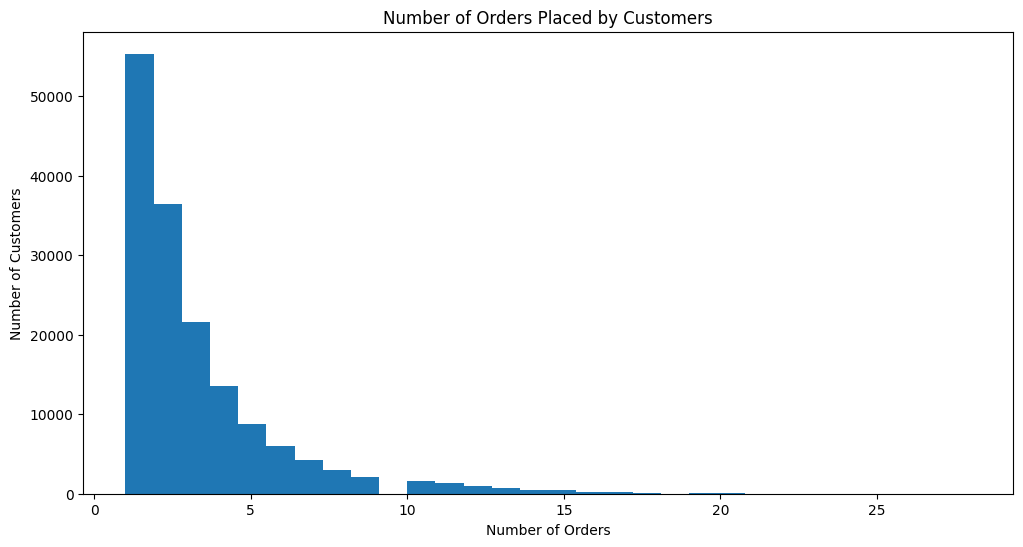

In [100]:
plt.figure(figsize=(12, 6))
plt.hist(orders_per_customer.index, weights=orders_per_customer.values, bins=30)

    
plt.title('Number of Orders Placed by Customers')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [101]:
popular_products = order_products.merge(products, on='product_id')

In [102]:
grp_popular_products = popular_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
print(grp_popular_products.head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


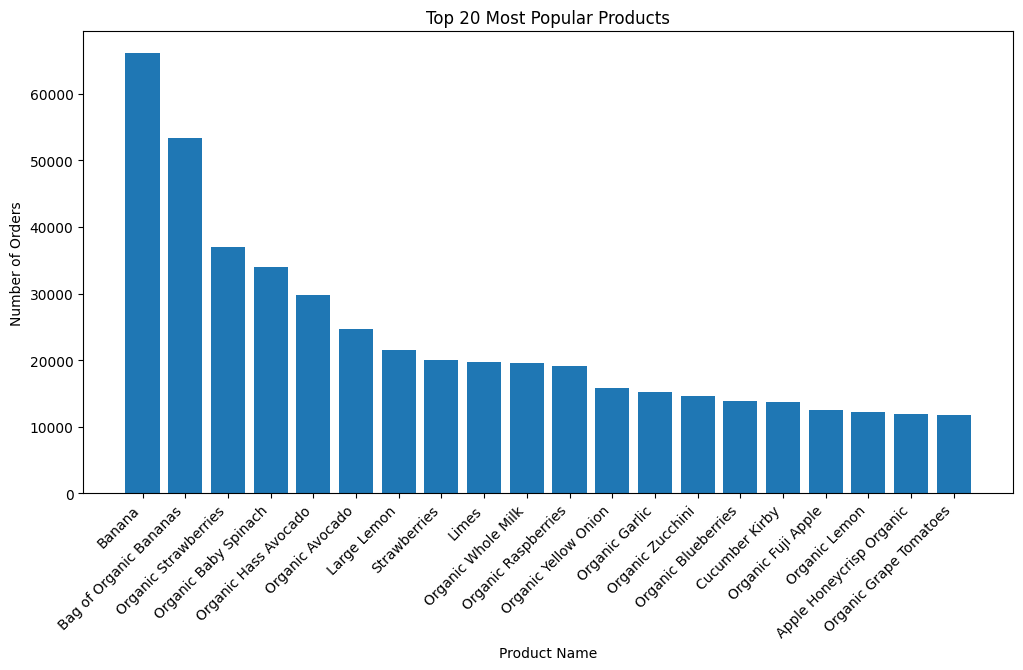

In [103]:
plt.figure(figsize=(12, 6))
plt.bar(grp_popular_products.index.get_level_values('product_name')[:20],
        grp_popular_products.values[:20])


plt.xticks(rotation=45, ha= 'right')

plt.title('Top 20 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')


plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [104]:
items_per_order=order_products.groupby('order_id')['product_id'].count().rename('items_per_order')
print(items_per_order)
distribution_of_order_size = items_per_order.value_counts().sort_index()
print(distribution_of_order_size)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: items_per_order, Length: 450046, dtype: int64
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: items_per_order, Length: 90, dtype: int64


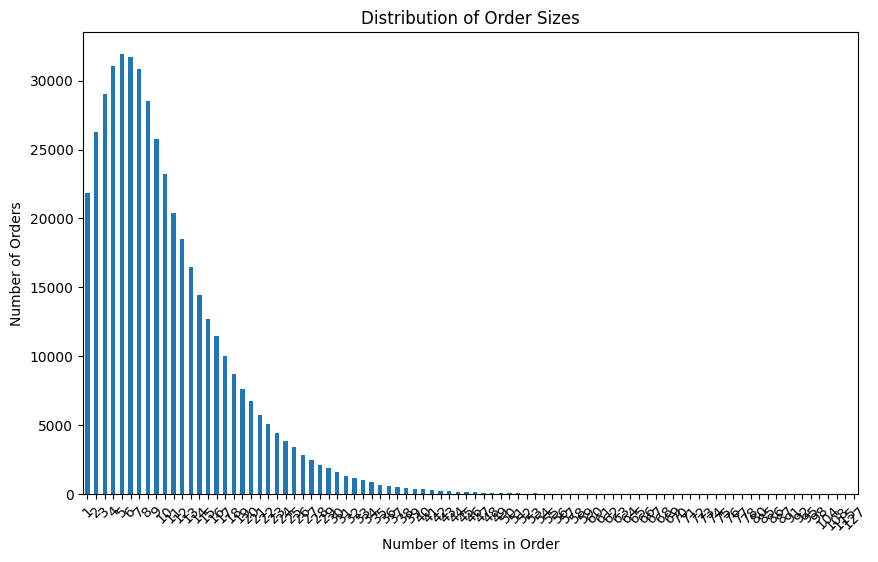

In [105]:
plt.figure(figsize=(10, 6))
distribution_of_order_size.plot(kind='bar')

plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Sizes')

plt.xticks(rotation=45)

plt.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

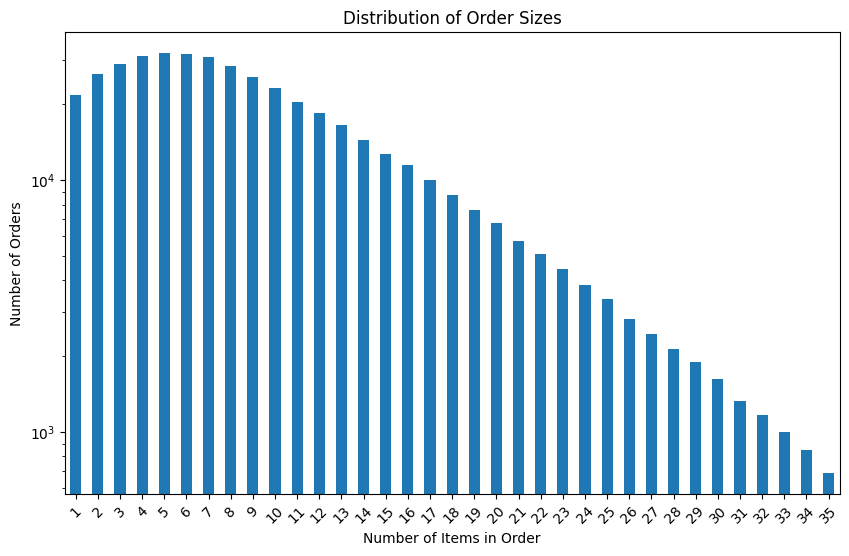

In [106]:
plt.figure(figsize=(10, 6))
distribution_of_order_size[:35].plot(kind='bar')

plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Sizes')

plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [107]:
reordered_products = order_products[order_products['reordered'] == 1]
print(reordered_products)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [ ]:
reordered_products_names = reordered_products.merge(products, on = 'product_id', how = 'left')
grp_reordered_products_names = reordered_products_names.groupby(['product_id','product_name']).size()

In [ ]:
grp_reordered_products_names = grp_reordered_products_names.sort_values(ascending=False)
print(grp_reordered_products_names.head(20))

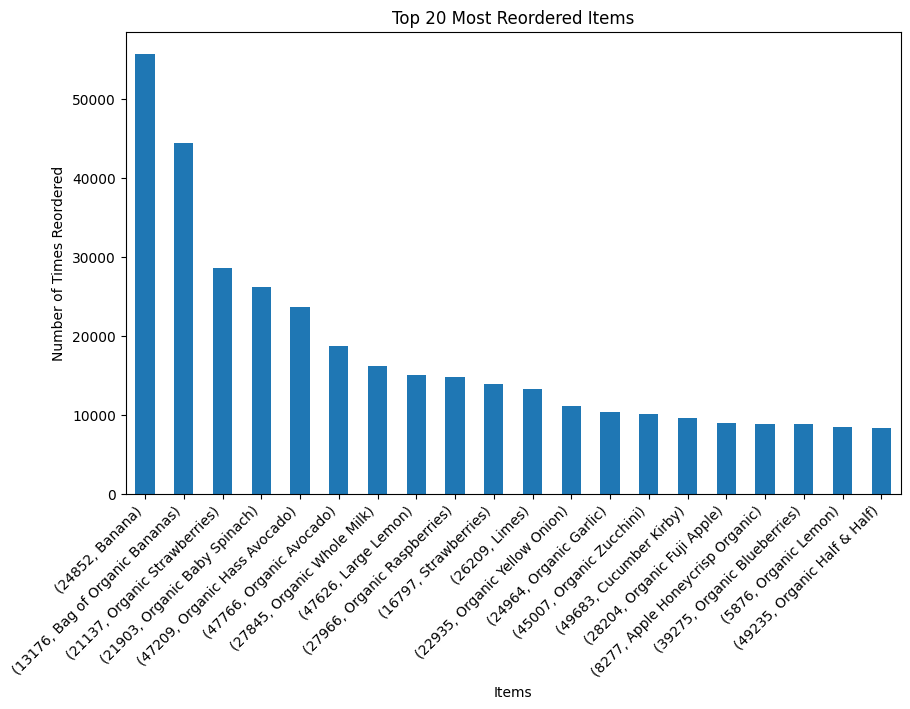

In [122]:
plt.figure(figsize=(10, 6))
grp_reordered_products_names[:20].plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Reordered')
plt.title('Top 20 Most Reordered Items')

plt.xticks(rotation=45, ha='right')

plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [123]:
reordered_products_frequency = order_products.merge(products, on = 'product_id', how = 'left')


In [124]:
reordered_rates = (reordered_products_frequency.groupby(['product_id','product_name'])['reordered'].mean()
    .sort_values(ascending=False)
    .reset_index())
print(reordered_rates)

       product_id                                       product_name  \
0           13421  Advanced Care Plaque Guard Frosted Mint Antipl...   
1           44412                     Seafood Magic Seasoning Blends   
2           29201                    Pretzels Sesame Baked Not Fried   
3           44440                     Purrfect Delicacies Multi-pack   
4           29219                          Homestyle Salisbury Steak   
...           ...                                                ...   
44609        2598                  Maui Cooler Big Pouch Juice Drink   
44610       42378             Butter-Smart Balance Microwave Popcorn   
44611       25306                                    Whiting Fillets   
44612       19523                            Kukui Cocoa Body Butter   
44613        7181                                     Chipotle Chile   

       reordered  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
...          ...  
44

In [125]:
reordered_rates = (reordered_products_frequency.groupby(['product_id','product_name'])['reordered'].mean()
    .reset_index()
    .sort_values('product_id', ascending=True))
print(reordered_rates)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
44609       49690                      HIGH PERFORMANCE ENERGY DRINK   
44610       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
44611       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
44612       49693                             SPRING WATER BODY WASH   
44613       49694                            BURRITO- STEAK & CHEESE   

       reordered  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
4       0.500000  
...          ...  
44

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [126]:
reordered_products_freq_customer = order_products.merge(orders, on = 'order_id', how = 'left')

In [127]:
reordered_rates_customer = (reordered_products_freq_customer.groupby(['user_id'])['reordered'].mean()
    .sort_values(ascending=False)
    .reset_index())
print(reordered_rates_customer)

        user_id  reordered
0        137587        1.0
1        173474        1.0
2         13918        1.0
3         62300        1.0
4         62307        1.0
...         ...        ...
149621   190953        0.0
149622   119371        0.0
149623    63173        0.0
149624    63163        0.0
149625   165726        0.0

[149626 rows x 2 columns]


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [128]:
most_frequent_items_added_first_to_carts = order_products.merge(products, on = 'product_id', how = 'left')
added_first_to_cart = order_products[order_products['add_to_cart_order'] == 1]

In [129]:
first_items_frequency = (added_first_to_cart.merge(products, on='product_id', how='left')
                        .groupby(['product_id', 'product_name'])
                        .size()
                        .reset_index(name='frequency')
                        .sort_values('frequency', ascending=False))

In [130]:
print(first_items_frequency.head(20))

       product_id                 product_name  frequency
13280       24852                       Banana      15562
7051        13176       Bag of Organic Bananas      11026
14881       27845           Organic Whole Milk       4363
11266       21137         Organic Strawberries       3946
25195       47209         Organic Hass Avocado       3390
11665       21903         Organic Baby Spinach       3336
25485       47766              Organic Avocado       3044
10507       19660                 Spring Water       2336
8955        16797                 Strawberries       2308
14955       27966          Organic Raspberries       2024
23793       44632   Sparkling Water Grapefruit       1914
26264       49235          Organic Half & Half       1797
25411       47626                  Large Lemon       1737
115           196                         Soda       1733
20658       38689     Organic Reduced Fat Milk       1397
14016       26209                        Limes       1370
6588        12

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.